In [ ]:
import os
import autogen
from autogen.coding import DockerCommandLineCodeExecutor
from autogen import ConversableAgent
from client import CustomModelClient

In [19]:
# Create a Docker command line code executor.
executor = DockerCommandLineCodeExecutor(
    image="python:3.12-slim",  # Execute code using the given docker image name.
    timeout=300,  # Timeout for each code execution in seconds.
    work_dir="coding",  # Use the directory to store the code files.
)

# Create an agent with code executor configuration that uses docker.
code_executor_agent_using_docker = ConversableAgent(
    "code_executor_agent_docker",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the docker command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

# When the code executor is no longer used, stop it to release the resources.
# executor.stop()

In [20]:
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. Assume the required packages does not exist and have to be installed.
3. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

config_list_custom = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    #filter_dict={"model": ["openai"]},
)

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_list_custom},
    code_execution_config=False,  # Turn off code execution for this agent.
)

[autogen.oai.client: 06-15 10:24:47] {890} INFO - Detected custom model client in config: CustomModelClient, model client can not be used until register_model_client is called.


INFO:autogen.oai.client:Detected custom model client in config: CustomModelClient, model client can not be used until register_model_client is called.


In [21]:
code_writer_agent.register_model_client(model_client_cls=CustomModelClient)

Initialized Cerebras client for model: llama-4-scout-17b-16e-instruct


In [23]:
import datetime

today = datetime.datetime.now().strftime("%Y-%m-%d")
chat_result = code_executor_agent_using_docker.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}. Write Python code to plot Ireland's 2023 Carbon emissions"
    "save the plot to a file named 'carbon_emission2023.png'.",
)

code_executor_agent_docker (to code_writer_agent):

Today is 2025-06-15. Write Python code to plot Ireland's 2023 Carbon emissionssave the plot to a file named 'carbon_emission2023.png'.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent_docker):

Plan:
1. Gather Ireland's 2023 carbon emissions data (CO2 emissions by sector or total value).
2. Use matplotlib to plot the data.
3. Save the plot as 'carbon_emission2023.png'.

Step 1 uses code to get info from the web.  
Step 2 & 3 use code for plotting.

Let's first retrieve information on Ireland's 2023 carbon emissions using online sources.

```python
# Install required packages
import sys
import subprocess

def install_and_import(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        __import__(package)

install_and_import('request

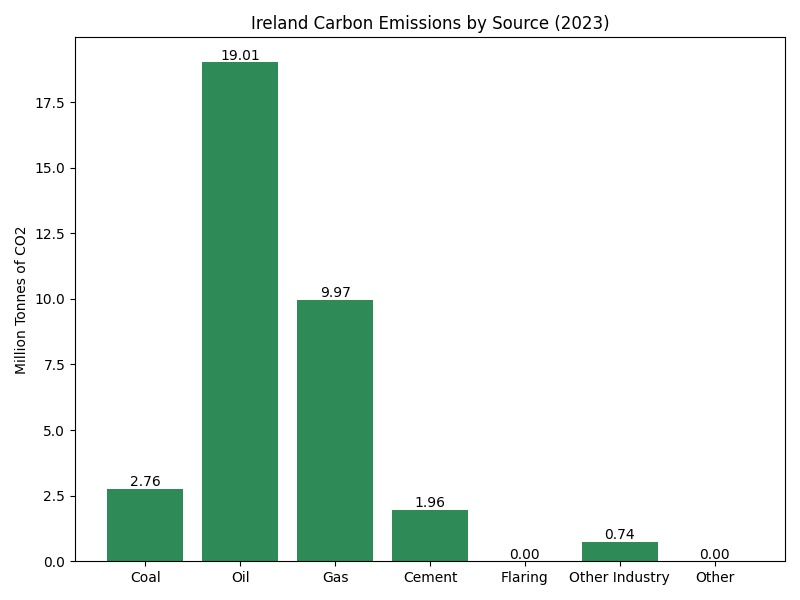

In [24]:
from IPython.display import Image
Image(filename="coding/carbon_emission2023.png")

In [16]:
current_model = code_writer_agent.llm_config["config_list"][
    code_writer_agent.llm_config.get("model_index", 0)
]["model"]
print(f"Current model: {current_model}")

Current model: openai/gpt-4.1


In [38]:
dir(code_writer_agent)

['DEFAULT_CONFIG',
 'DEFAULT_SUMMARY_METHOD',
 'DEFAULT_SUMMARY_PROMPT',
 'MAX_CONSECUTIVE_AUTO_REPLY',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_a_execute_tool_call',
 '_a_summary_from_nested_chats',
 '_abc_impl',
 '_add_functions',
 '_add_single_function',
 '_append_oai_message',
 '_assert_valid_name',
 '_check_chat_queue_for_sender',
 '_code_execution_config',
 '_consecutive_auto_reply_counter',
 '_create_client',
 '_create_or_get_executor',
 '_create_tool_if_needed',
 '_default_auto_reply',
 '_deprecated_a_run',
 '_deprecated_run',
 '_description',
 '_format_j